## 2. Numerical Solution
Now, let's work on numerical solution such as RK4 method. We will use `scipy.integrate.solve_ivp` for this.

We require the differential equations which governs our system.

For $m_1$, 
$$ F_{12} = \frac{G m_1 m_2}{r^2} \;\;\;\;\;\;\;\; m_1 a_1 = \frac{G m_1 m_2}{r^2} $$
$$ \frac{d^2r_1}{dt^2} = \frac{G m_2}{r^2} $$
as, $\vec r_2 = \frac{-m_1}{m_2} \vec r_1$, therefore, $r = \frac{m_1 + m_2}{m_2} r_1$, hence,

$$\frac{d^2r_1}{dt^2} = - \frac{G}{r_1^2} \frac{m_2^3}{(m_1 + m_2)^2}$$

Now, in cartesian coordinates,

$$ r_1^2 = (x_{com} - x_{1com})^2 + (y_{com} - y_{1com})^2 $$

$$ r_1^2 = x_1^2 + y_1^2 $$

$$ r \frac{d^2r}{dt^2} = x \frac{d^2x}{dt^2} + y \frac{d^2y}{dt^2} $$

Therefore, we can write our equations in,

$$\frac{d^2x_1}{dt^2} = - G  \frac{m_2^3}{(m_1 + m_2)^2} \frac{x_1}{r_1^3}$$

$$\frac{d^2y_1}{dt^2} = - G  \frac{m_2^3}{(m_1 + m_2)^2} \frac{y_1}{r_1^3}$$

for solving using `scipy.intergrate.solve_ivp` we need to break our 2nd order equations into 1st order equations.

$$ v_x = \frac{dx_1}{dt}$$

$$ v_y = \frac{dy_1}{dt}$$

$$\frac{dv_x}{dt} = - G \frac{m_2^3}{(m_1 + m_2)^2} \frac{x_1}{r_1^3}$$

$$\frac{dv_y}{dt} = - G  \frac{m_2^3}{(m_1 + m_2)^2} \frac{y_1}{r_1^3}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 
from scipy.integrate import odeint
from astropy import constants as ac, units as u
from prettytable import PrettyTable

## Sample System - Alpha Centauri System

Let's take Alpha Centauri System for our calculations

#### Alpha Centauri A

M = 1.1 $M_\odot$,   Distance from CoM = 10.9 AU,   a1 - 10.52 AU,    r1 - 1.2234 $R_\odot$


#### Alpha Centauri B

M = 0.907 $M_\odot$,   Distance from CoM = 12.8 AU,   a2 - 0.876 AU,   r2 - 0.8632 $R_\odot$


#### Orbit

Period (P) - 79.91±0.011 yr

Semi-major axis (a)	- 17.57±0.022″ - 23 AU

Eccentricity (e) - 0.5179±0.00076

Inclination (i) - 79.205±0.041°

Longitude of the node (Ω) - 204.85±0.084°

Periastron epoch (T) - 1875.66±0.012

Argument of periastron (ω) (secondary) - 231.65±0.076°

Recent Periastron - Aug 1955

Next Periastron - May 2035

In [ ]:
m_self = 6*u.M_sun
m_part = 2*u.M_sun
xcom = 0
ycom = 0
x0 = -0.1*u.AU
y0 = 0*u.AU
vx0 = 0*u.km/u.s
vy0 = -45.89*u.km/u.s
P = 2.815*u.year

def ode_func(t,init):
    x = init[0] #assigning the values
    y = init[1]
    vx = init[2]
    vy = init[3]
    r = np.sqrt(x*x + y*y)
    
    m1 = m_self.to('kg').value #converting to kg
    m2 = m_part.to('kg').value
    
    M = (m2*m2*m2) / ((m1+m2)**2) #mass function
    
    k = ac.G.value*M
    
    d1 = (x) / (r*r*r)
    d2 = (y) / (r*r*r)
    return [vx,vy,-k*d1,-k*d2]

#n = 1000 #no. of steps

# time and initial value array 
t_span = (0, P.to('s').value)
t = np.linspace(0, P.to('s').value, 100000)

init_values = [x0.to('m').value, y0.to('m').value, vx0.to('m/s').value, vy0.to('m/s').value]

#solver - method RK4
ode_sol = solve_ivp(ode_func, t_span, init_values,  method='RK45', t_eval = t)

time = (ode_sol.t*u.s).to('year').value
sol = ode_sol.y


#solution value assignment
x = (sol[0]*u.m).to('AU')
y = (sol[1]*u.m).to('AU')
r = np.sqrt(x*x + y*y)

vx = sol[2]*u.m/u.s
vy = sol[3]*u.m/u.s

v1 = (np.sqrt(vx*vx + vy*vy)).to('km/s').value
v2 = (m_self*v1)/m_part

#graph plotting
plt.figure(figsize=(16,8))
plt.plot(time, v1, label = 'Star 1')
plt.plot(time, v2, label = 'Star 2')
plt.ylabel("Orbital Velocity (in km/s)")
plt.xlabel("Time (in years)")
plt.legend()
plt.grid()
plt.show

In [ ]:
plt.plot(x, y)
plt.show

In [ ]:
m_self = 1.1*u.M_sun
m_part = 0.907*u.M_sun
x0 = -0.1*u.AU
y0 = 0*u.AU
vx0 = 0*u.km/u.s
vy0 = 10.4*u.km/u.s
P = 79.91*u.year

def ode_func(t,init):
    x = init[0] #assigning the values
    y = init[1]
    vx = init[2]
    vy = init[3]
    r = np.sqrt(x*x + y*y)
    
    m1 = m_self.to('kg').value #converting to kg
    m2 = m_part.to('kg').value
    
    M = (m2*m2*m2) / ((m1+m2)**2) #mass function
    
    k = ac.G.value*M
    
    d1 = (x) / (r*r*r)
    d2 = (y) / (r*r*r)
    return [vx,vy,-k*d1,-k*d2]

#n = 1000 #no. of steps

# time and initial value array 
t_span = (0, P.to('s').value)
t = np.linspace(0, P.to('s').value, 100000)

init_values = [x0.to('m').value, y0.to('m').value, vx0.to('m/s').value, vy0.to('m/s').value]

#solver - method RK4
ode_sol = solve_ivp(ode_func, t_span, init_values,  method='RK45', t_eval = t)

time = (ode_sol.t*u.s).to('year').value
sol = ode_sol.y


#solution value assignment
x = (sol[0]*u.m).to('AU')
y = (sol[1]*u.m).to('AU')
r = np.sqrt(x*x + y*y)

vx = sol[2]*u.m/u.s
vy = sol[3]*u.m/u.s

v1 = (np.sqrt(vx*vx + vy*vy)).to('km/s').value
v2 = (m_self*v1)/m_part

#graph plotting
plt.figure(figsize=(16,8))
plt.plot(time, v1, label = 'Alpha Centauri A')
plt.plot(time, v2, label = 'Alpha Centauri B')
plt.ylabel("Orbital Velocity (in km/s)")
plt.xlabel("Time (in years)")
plt.legend()
plt.grid()
plt.show

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.show

In [ ]:
G = (m**3)/(kg*(s**2))

In [ ]:
ac.G

In [ ]:
ac.G.to('(AU**3)/(solMass year**2)')

In [ ]:
ac.G.to('(km**3)/(kg year**2)')

In [ ]:
ac.c.to('km/s')

In [ ]:
ac.g0.to('km/s**2')

In [ ]:
ac.M_sun

In [ ]:
u.M_sun

In [ ]:
4*np.pi**2

In [ ]:
m_self = 1.1*u.M_sun
m_part = 0.907*u.M_sun
x0 = -0.1*u.AU
y0 = 0*u.AU
vx0 = 0*u.km/u.s
vy0 = 10.4*u.km/u.s
P = 79.91*u.year


def ode_func(t,init):
    x = init[0] #assigning the values
    y = init[1]
    vx = init[2]
    vy = init[3]
    r = np.sqrt(x*x + y*y)
    
    m1 = m_self.value 
    m2 = m_part.value
    
    M = (m2*m2*m2) / ((m1+m2)**2) #mass function
    
    k = (ac.G.to('(AU**3)/(solMass year**2)').value)*M #G in terms of AU, Solar Mass, and Years
    
    d1 = (x) / (r*r*r)
    d2 = (y) / (r*r*r)
    return [vx,vy,-k*d1,-k*d2]

#n = 1000 #no. of steps

# time and initial value array 
t_span = (0, P.value)
t = np.linspace(0, P.value, 100000)

init_values = [x0.value, y0.value, vx0.to('AU/year').value, vy0.to('AU/year').value]

#solver - method RK4
ode_sol = solve_ivp(ode_func, t_span, init_values,  method='RK45', t_eval = t)

time = ode_sol.t
sol = ode_sol.y


#solution value assignment
x = sol[0]*u.AU
y = sol[1]*u.AU
r = np.sqrt(x*x + y*y)

vx = sol[2]*u.AU/u.year
vy = sol[3]*u.AU/u.year

v1 = np.sqrt(vx*vx + vy*vy)
v2 = (m_self*v1)/m_part

#graph plotting
plt.figure(figsize=(16,8))
plt.plot(time, v1, label = 'Alpha Centauri A')
plt.plot(time, v2, label = 'Alpha Centauri B')
plt.ylabel("Orbital Velocity (in AU/yr)")
plt.xlabel("Time (in years)")
plt.legend()
plt.grid()
plt.show

In [ ]:
(30000*u.m/u.s)*(365*24*3600*u.s/ac.au)

In [ ]:
m_self = 1.1*u.M_sun
m_part = 0.907*u.M_sun
x0 = -0.1*u.AU
y0 = 0*u.AU
vx0 = 0*u.km/u.s
vy0 = -23.5*u.km/u.s
P = 20.91*u.year


#Define universal gravitation constant
G = ac.G.to('(AU**3)/(solMass year**2)')

#Reference quantities
m_nd = 1*u.solMass       #mass of the sun
r_nd = 35.6*u.AU         #distance between stars in Alpha Centauri
v_nd = 6.32*u.AU/u.year  #relative velocity of earth around the sun
t_nd = 79.91*u.year      #orbital period of Alpha Centauri

#Net constants
K1 = G*t_nd*m_nd / (r_nd**2*v_nd)
K2 = v_nd*t_nd / r_nd


def ode_func(t,init):
    x = init[0] #assigning the values
    y = init[1]
    vx = init[2]
    vy = init[3]
    r = np.sqrt(x*x + y*y)
    
    m1 = m_self.value 
    m2 = m_part.value
    
    M = (m2*m2*m2) / ((m1+m2)**2) #mass function
    
    k = K1*M #G in terms of AU, Solar Mass, and Years
    
    d1 = (x) / (r*r*r)
    d2 = (y) / (r*r*r)
    return [K2*vx, K2*vy, -k*d1, -k*d2]

#n = 1000 #no. of steps

# time and initial value array 
t_span = (0, 10)
t = np.linspace(0, 10, 100000)

init_values = [x0.value, y0.value, vx0.to('AU/year').value, vy0.to('AU/year').value]

#solver - method RK4
ode_sol = solve_ivp(ode_func, t_span, init_values,  method='RK45', t_eval = t)

time = ode_sol.t
sol = ode_sol.y


#solution value assignment
x = sol[0]*u.AU
y = sol[1]*u.AU
r = np.sqrt(x*x + y*y)

vx = sol[2]*u.AU/u.year
vy = sol[3]*u.AU/u.year

v1 = np.sqrt(vx*vx + vy*vy)
v2 = (m_self*v1)/m_part

#graph plotting
plt.figure(figsize=(16,8))
plt.plot(time, v1, label = 'Alpha Centauri A')
plt.plot(time, v2, label = 'Alpha Centauri B')
plt.ylabel("Orbital Velocity (in AU/yr)")
plt.xlabel("Time (in years)")
plt.legend()
plt.grid()
plt.show

+-------------------------+---------------------+------+
| Parameter               |        Value        | Unit |
+-------------------------+---------------------+------+
| Orbital Eccentricity    |  0.8992329949008512 |      |
| Star 1: Semi-Major Axis |  0.9971025405706306 |  AU  |
| Star 1: Orbital Period  | 0.35202454276216605 |  yr  |
| Star 2: Semi-Major Axis |  2.9913076217118917 |  AU  |
| Star 2: Orbital Period  |  1.8291731807258236 |  yr  |
+-------------------------+---------------------+------+


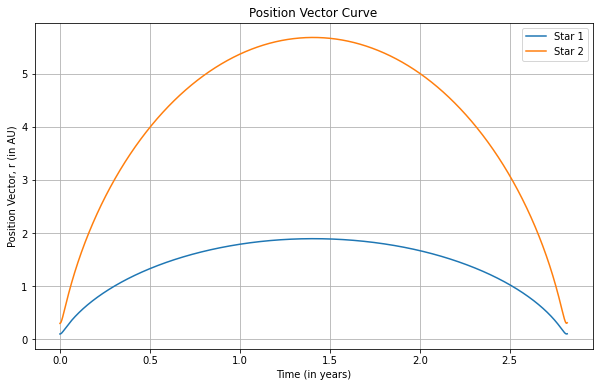

<Figure size 432x288 with 0 Axes>

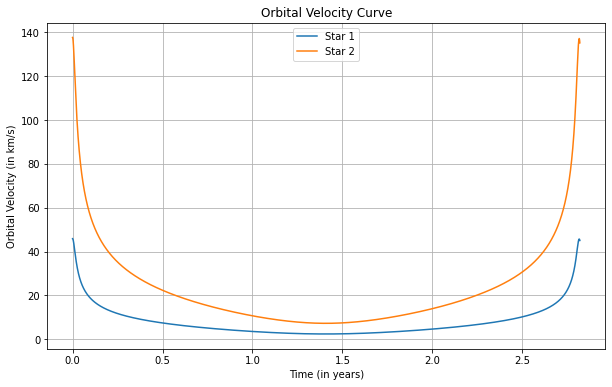

<Figure size 432x288 with 0 Axes>

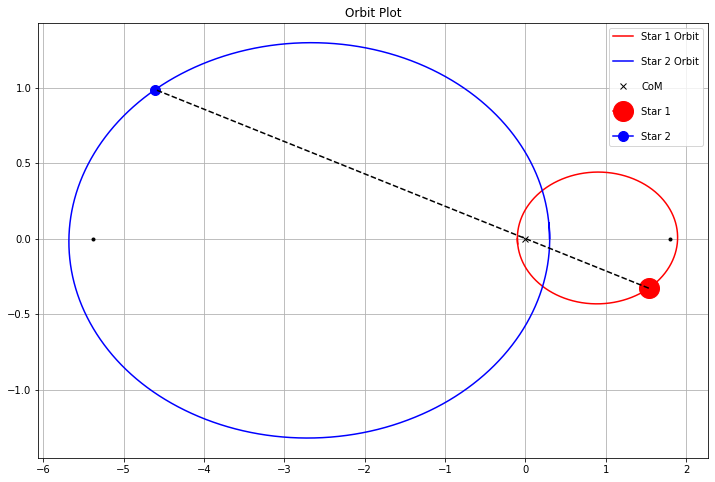

<Figure size 432x288 with 0 Axes>

In [3]:
def ode(m1,m2,ti,tf,x0,y0,vx0,vy0):
    """This function solves the two-body odes using scipy.integrate.solve_ivp using,
    m - mass of stars
    ti - initial time
    tf - final time
    x0, y0 - initial coordinates of the star
    vx0, vy0 - initial velocity of the star
    """
    #mass of the stars
    m_self = m1*u.M_sun
    m_part = m2*u.M_sun
    
    #initial values
    x0 = x0*u.AU        #initial position
    y0 = y0*u.AU
    vx0 = vx0*u.km/u.s  #initial velocity 
    vy0 = vy0*u.km/u.s
    
    init_values = [x0.to('m').value, y0.to('m').value, vx0.to('m/s').value, vy0.to('m/s').value]

    #time and initial value array 
    ti = ti*u.year   #initial time
    tf = tf*u.year   #final time
    
    t_span = (ti.to('s').value, tf.to('s').value)  # array for integration time t0 to tf
    t = np.linspace(ti.to('s').value, tf.to('s').value, 100000)

    def ode_func(t,init):
        """This function generates differential equations of 1 star in 2-body problem system from CoM frame in cartessian system."""
        x = init[0] #assigning the values
        y = init[1]
        vx = init[2]
        vy = init[3]
        r = np.sqrt(x*x + y*y) 

        m_1 = m_self.to('kg').value #converting to kg
        m_2 = m_part.to('kg').value

        M = (m_2*m_2*m_2) / ((m_1+m_2)**2) #mass function

        k = ac.G.value*M #universal constant

        d1 = (x) / (r*r*r) 
        d2 = (y) / (r*r*r)
        ax = -k*d1 
        ay = -k*d2
        return vx,vy,ax,ay 

    
    #ode solver - method RK4
    def ode_solver(ode_func, t_span, init_values, t):
        ode_sol = solve_ivp(ode_func, t_span, init_values,  method='RK45', t_eval = t)

        time = (ode_sol.t*u.s).to('year').value  #time array
        sol = ode_sol.y                          #solution array (consists arrays of x,y,vx,vy)
        return time,sol


    def orb_param(sol):
        """This function generates orbital parameters from the ode solution"""
        x1 = (sol[0]*u.m).to('AU')
        y1 = (sol[1]*u.m).to('AU')
        r1 = np.sqrt(x1*x1 + y1*y1)         # in AU

        m_ratio = m_self/m_part #mass ratio
        m_sum = m_self+m_part       #mass sum

        x2 = -1*x1*m_ratio
        y2 = -1*y1*m_ratio
        r2 = np.sqrt(x2*x2 + y2*y2)         # in AU

        vx1 = sol[2]*u.m/u.s
        vy1 = sol[3]*u.m/u.s

        v1 = (np.sqrt(vx1*vx1 + vy1*vy1)).to('km/s').value  #orbital velocity of star 1 in km/s
        v2 = (v1*m_ratio).value                     #orbital velocity of star 2 in km/s

        #calculating orbital parameters
        x1_min, x1_max = min(x1), max(x1) #periastron and apastron
        y1_min, y1_max = min(y1), max(y1)
        a1 = (x1_max - x1_min)/2  #semi-major axis of star 1
        b1 = (y1_max - y1_min)/2  #semi-minor axis of star 2
        e = np.sqrt(1-(b1.value**2/a1.value**2))  #eccentricity

        a2 = a1*m_ratio #semi-major axis of star 1

        p1 = 2*np.pi*np.sqrt((a1)**3/((ac.G.to('(AU**3)/(solMass year**2)'))*m_sum))  #time-period of Star 1 in year
        p2 = p1*(m_ratio**(3/2))                                                  #time-period of Star 2 in year

        #printing tabular output
        t = PrettyTable()
        t.field_names = ["Parameter", "Value", "Unit"]
        t.align["Parameter"] = 'l'
        t.add_row(['Orbital Eccentricity',e,""])
        t.add_row(['Star 1: Semi-Major Axis',a1.value,u.au])
        t.add_row(['Star 1: Orbital Period',p1.value,u.year])
        t.add_row(['Star 2: Semi-Major Axis',a2.value,u.au])
        t.add_row(['Star 2: Orbital Period',p2.value,u.year])
        print(t)

        return r1,r2,x1,y1,x2,y2,v1,v2,a1,a2,e,m_ratio
    
    
    #plotting the curves
    def orb_pos_plot(r1,r2,time):
        """This function plots position vector curve."""
        plt.figure(figsize=(10,6))
        plt.plot(time, r1, label = 'Star 1')
        plt.plot(time, r2, label = 'Star 2')
        plt.title('Position Vector Curve')
        plt.ylabel("Position Vector, r (in AU)")
        plt.xlabel("Time (in years)")
        plt.legend()
        plt.grid()
        plt.show()
        plt.savefig('ode r vs t plot.png', dpi = 300)
        
    def orb_vel_plot(v1,v2,time):
        """This function plots orbital velocity curve."""
        plt.figure(figsize=(10,6))
        plt.plot(time, v1, label = 'Star 1')
        plt.plot(time, v2, label = 'Star 2')
        plt.title('Orbital Velocity Curve')
        plt.ylabel("Orbital Velocity (in km/s)")
        plt.xlabel("Time (in years)")
        plt.legend()
        plt.grid()
        plt.show()
        plt.savefig('ode v vs t plot.png', dpi = 300)
        
    
    def mark(sol):
        """"This function generates markers for plotting."""
        X1 = (sol[0,25000]*u.m).to('AU').value
        Y1 = (sol[1,25000]*u.m).to('AU').value
        X2 = -1*X1*m_ratio
        Y2 = -1*Y1*m_ratio
        return X1,Y1,X2,Y2
    
    #plotting the orbit
    def orb_plot(x1,x2,X1,Y2,a1,a2,e):
        """This function plots orbit curves."""
        plt.figure(figsize=(12,8))
        plt.plot(x1, y1, color='red', label='Star 1 Orbit')
        plt.plot(x2, y2, color='blue', label='Star 2 Orbit')
        plt.plot(0, 0, 'kx', label = 'CoM')
        plt.plot(2*a1*e, 0, 'k.')
        plt.plot(-2*a2*e, 0, 'k.')
        plt.plot(X1, Y1, color='red', marker = 'o', markersize=2*10, label='Star 1')
        plt.plot(X2, Y2, color='blue', marker = 'o', markersize=1*10, label='Star 2')
        plt.plot([X1, X2], [Y1, Y2], 'k--')
        plt.title('Orbit Plot')
        plt.xlim()
        plt.ylim()
        plt.legend(labelspacing=1.5)
        plt.grid()
        plt.show()
        plt.savefig('ode orbit plot.png', dpi = 300)
    
    time,sol = ode_solver(ode_func, t_span, init_values, t)
    r1,r2,x1,y1,x2,y2,v1,v2,a1,a2,e,m_ratio = orb_param(sol)
    orb_pos_plot(r1,r2,time)
    orb_vel_plot(v1,v2,time)
    X1,Y1,X2,Y2 = mark(sol)    
    orb_plot(x1,x2,X1,Y2,a1,a2,e)
    
    
    
    
ode(6,2,0,2.82,-0.1,0,0,-45.89)

In [60]:
t = PrettyTable()
t.field_names = ["Parameter", "Value", "Unit"]
t.align["Parameter"] = 'l'
t.add_row(['Orbital Eccentricity',0.8992329949008512,""])
t.add_row(['Star 1: Semi-Major Axis',0.9971025405706306,u.au])
t.add_row(['Star 1: Orbital Period',0.35202454276216605,u.year])
t.add_row(['Star 2: Semi-Major Axis',0.9971025405706306,u.au])
t.add_row(['Star 2: Orbital Period',0.35202454276216605,u.year])
print(t)

+-------------------------+---------------------+------+
| Parameter               |        Value        | Unit |
+-------------------------+---------------------+------+
| Orbital Eccentricity    |  0.8992329949008512 |      |
| Star 1: Semi-Major Axis |  0.9971025405706306 |  AU  |
| Star 1: Orbital Period  | 0.35202454276216605 |  yr  |
| Star 2: Semi-Major Axis |  0.9971025405706306 |  AU  |
| Star 2: Orbital Period  | 0.35202454276216605 |  yr  |
+-------------------------+---------------------+------+


Semi-Major axis of Star 1 Orbit: 0.9953030991185077 AU
Orbital Period of the Star 1: 0.3510720404091746 AU(3/2)
Semi-Major axis of Star 2 Orbit: 2.985909297355523 AU
Orbital Period of the Star 2: 1.8242238333166934 AU(3/2)
Orbital Eccentricity: 0.8990786068194858


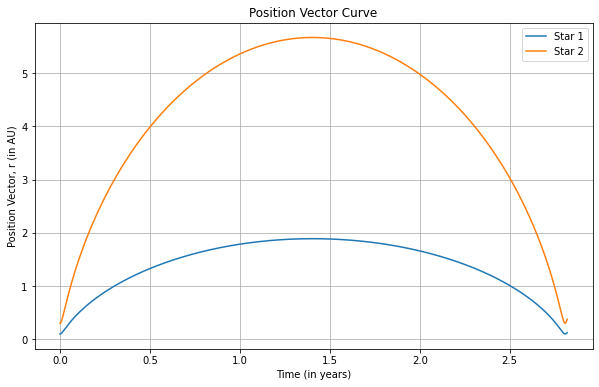

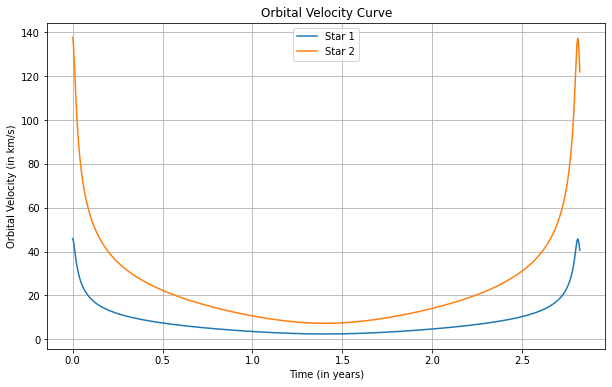

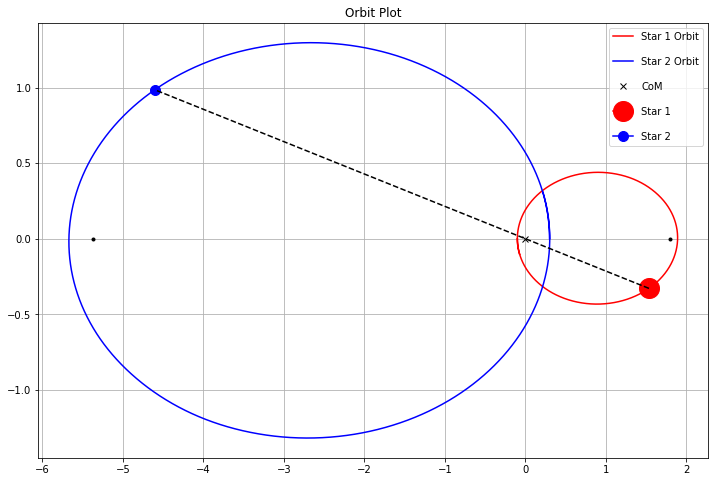

In [34]:
def ode_opt(m1,m2,ti,tf,x0,y0,vx0,vy0):
    """This function solves the two-body odes using scipy.integrate.solve_ivp using,
    m - mass of stars in solar mass
    ti - initial time in year
    tf - final time in year
    x0, y0 - initial coordinates of the star in AU
    vx0, vy0 - initial velocity of the star in Km/s
    """
    
    #Universal Gravitional Constant
    G = ac.G.to('(AU**3)/(solMass year**2)').value
    
    #initial values
    x0 = x0*u.AU        #initial position
    y0 = y0*u.AU
    vx0 = vx0*u.km/u.s  #initial velocity 
    vy0 = vy0*u.km/u.s
    
    init_values = [x0.value, y0.value, vx0.to('AU/year').value, vy0.to('AU/year').value]
    
    t_span = (ti, tf)  # array for integration time t0 to tf
    t = np.linspace(ti, tf, 100000)

    def ode_func(t,init):
        """This function generates differential equations of 1 star in 2-body problem system from CoM frame in cartessian system."""
        x = init[0] #assigning the values
        y = init[1]
        vx = init[2]
        vy = init[3]
        r = np.sqrt(x*x + y*y) 

        M = (m2*m2*m2) / ((m1+m2)**2) #mass function

        k = G*M #universal constant

        d1 = (x) / (r*r*r) 
        d2 = (y) / (r*r*r)
        ax = -k*d1 
        ay = -k*d2
        return vx,vy,ax,ay 

    
    #ode solver - method RK4
    def ode_solver(ode_func, t_span, init_values, t):
        ode_sol = solve_ivp(ode_func, t_span, init_values,  method='RK45', t_eval = t)

        time = ode_sol.t      #time array
        sol = ode_sol.y       #solution array (consists arrays of x,y,vx,vy)
        return time,sol


    def orb_param(sol):
        """This function generates orbital parameters from the ode solution"""
        x1 = sol[0]*u.au
        y1 = sol[1]*u.au
        r1 = np.sqrt(x1*x1 + y1*y1)         # in AU

        m_ratio = m1/m2     #mass ratio
        m_sum = m1+m2       #mass sum

        x2 = -1*x1*m_ratio
        y2 = -1*y1*m_ratio
        r2 = np.sqrt(x2*x2 + y2*y2)         # in AU

        vx1 = sol[2]*u.AU/u.year
        vy1 = sol[3]*u.AU/u.year

        v1 = (np.sqrt(vx1*vx1 + vy1*vy1)).to('km/s').value  #orbital velocity of star 1 in km/s
        v2 = v1*m_ratio                            #orbital velocity of star 2 in km/s

        #calculating orbital parameters
        x1_min, x1_max = min(x1), max(x1) #periastron and apastron
        y1_min, y1_max = min(y1), max(y1)
        
        a1 = (x1_max - x1_min)/2  #semi-major axis of star 1
        b1 = (y1_max - y1_min)/2  #semi-minor axis of star 2
        e = np.sqrt(1-(b1.value**2/a1.value**2))  #eccentricity

        a2 = a1*m_ratio #semi-major axis of star 1

        p1 = 2*np.pi*np.sqrt((a1)**3/(G*m_sum))  #time-period of Star 1 in year
        p2 = p1*(m_ratio**(3/2))                 #time-period of Star 2 in year

        print('Semi-Major axis of Star 1 Orbit:',a1)
        print('Orbital Period of the Star 1:',p1)
        print('Semi-Major axis of Star 2 Orbit:',a2)
        print('Orbital Period of the Star 2:',p2)
        print('Orbital Eccentricity:',e)
        
        return r1,r2,x1,y1,x2,y2,v1,v2,a1,a2,e,m_ratio
    
    
    #plotting the curves
    def orb_pos_plot(r1,r2,time):
        """This function plots position vector curve."""
        plt.figure(figsize=(10,6))
        plt.plot(time, r1, label = 'Star 1')
        plt.plot(time, r2, label = 'Star 2')
        plt.title('Position Vector Curve')
        plt.ylabel("Position Vector, r (in AU)")
        plt.xlabel("Time (in years)")
        plt.legend()
        plt.grid()
        plt.show()
        
    def orb_vel_plot(v1,v2,time):
        """This function plots orbital velocity curve."""
        plt.figure(figsize=(10,6))
        plt.plot(time, v1, label = 'Star 1')
        plt.plot(time, v2, label = 'Star 2')
        plt.title('Orbital Velocity Curve')
        plt.ylabel("Orbital Velocity (in km/s)")
        plt.xlabel("Time (in years)")
        plt.legend()
        plt.grid()
        plt.show()
        
    
    def mark(sol):
        """"This function generates markers for plotting."""
        X1 = sol[0,25000] #in AU
        Y1 = sol[1,25000] #in AU
        X2 = -1*X1*m_ratio
        Y2 = -1*Y1*m_ratio
        return X1,Y1,X2,Y2
    
    #plotting the orbit
    def orb_plot(x1,x2,X1,Y2,a1,a2,e):
        """This function plots orbit curves."""
        plt.figure(figsize=(12,8))
        plt.plot(x1, y1, color='red', label='Star 1 Orbit')
        plt.plot(x2, y2, color='blue', label='Star 2 Orbit')
        plt.plot(0, 0, 'kx', label = 'CoM')
        plt.plot(2*a1*e, 0, 'k.')
        plt.plot(-2*a2*e, 0, 'k.')
        plt.plot(X1, Y1, color='red', marker = 'o', markersize=2*10, label='Star 1')
        plt.plot(X2, Y2, color='blue', marker = 'o', markersize=1*10, label='Star 2')
        plt.plot([X1, X2], [Y1, Y2], 'k--')
        plt.title('Orbit Plot')
        plt.xlim()
        plt.ylim()
        plt.legend(labelspacing=1.5)
        plt.grid()
        plt.show()
    
    time,sol = ode_solver(ode_func, t_span, init_values, t)
    r1,r2,x1,y1,x2,y2,v1,v2,a1,a2,e,m_ratio = orb_param(sol)
    orb_pos_plot(r1,r2,time)
    orb_vel_plot(v1,v2,time)
    X1,Y1,X2,Y2 = mark(sol)    
    orb_plot(x1,x2,X1,Y2,a1,a2,e)
    
    
ode_opt(6,2,0,2.82,-0.1,0,0,-45.89)

In [ ]:
#ode(m1,m2,P,init_val)
#%matplotlib widget
#from ipywidgets import interact, interactive, fixed, interact_manual
#import ipywidgets as widgets
#from IPython.display import display

%matplotlib inline

In [ ]:
def f(x):
    return x

interact(f,x=10);

In [ ]:
#interact(ode, m1=1.1, m2=0.907, P=80, x0=5.02, y0=0, vx0=0, vy0=(21.4))

ode(1.1,0.907,100,5.02,0,0,-21.78)